In [2]:
import numpy as np
import math
import numpy.random as npr
from pylab import plt, mpl

In [3]:
plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'

In [4]:
%matplotlib inline

(array([ 98.,   0.,   0.,   0.,   0.,   0.,  98.,   0.,   0.,   0.,   0.,
          0.,  86.,   0.,   0.,   0.,   0.,   0., 104.,   0.,   0.,   0.,
          0.,   0., 114.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100.]),
 <a list of 25 Patch objects>)

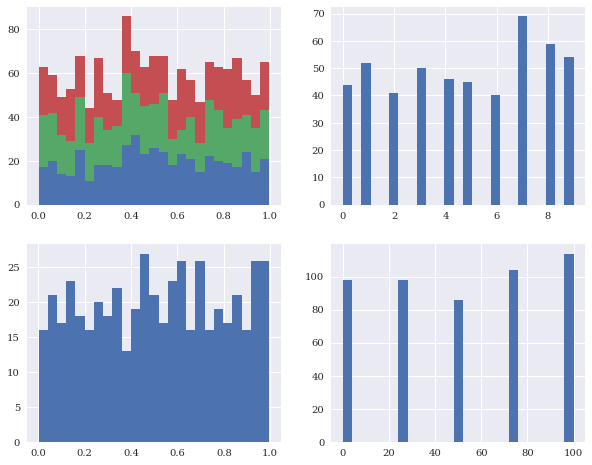

In [8]:
sample_size=500
rn1=npr.rand(sample_size,3)
rn2=npr.randint(0,10,sample_size)
rn3=npr.sample(size=sample_size)
a=[0,25,50,75,100]
rn4=npr.choice(a,size=sample_size)

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,8))
ax1.hist(rn1,bins=25,stacked=True)
ax2.hist(rn2,bins=25)
ax3.hist(rn3,bins=25)
ax4.hist(rn4,bins=25)

In [9]:
s0=100
r=0.05
sigma=0.25
T=2
I=10000


(array([  6.,  15.,  24.,  53.,  84., 147., 154., 196., 274., 343., 379.,
        402., 429., 466., 452., 476., 458., 465., 443., 389., 378., 369.,
        331., 340., 288., 289., 252., 234., 207., 174., 171., 149., 128.,
        128., 114., 108.,  76.,  79.,  63.,  49.,  42.,  32.,  34.,  45.,
         37.,  18.,  26.,  21.,  20.,  15.,  14.,   9.,  12.,  16.,  12.,
          8.,   6.,   8.,   6.,   6.,   6.,   1.,   1.,   2.,   3.,   0.,
          1.,   0.,   4.,   3.,   1.,   0.,   1.,   1.,   1.,   0.,   0.,
          0.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]), array([ 29.54689609,  33.56427387,  37.58165164,  41.59902941,
         45.61640719,  49.63378496,  53.65116274,  57.66854051,
         61.68591828,  65.70329606,  69.72067383,  73.7380516 ,
         77.75542938,  81.77280715,  85.79018493,  89.8075627 ,
         93.82494047,  97.84231825, 101.85969602, 105.87707379,

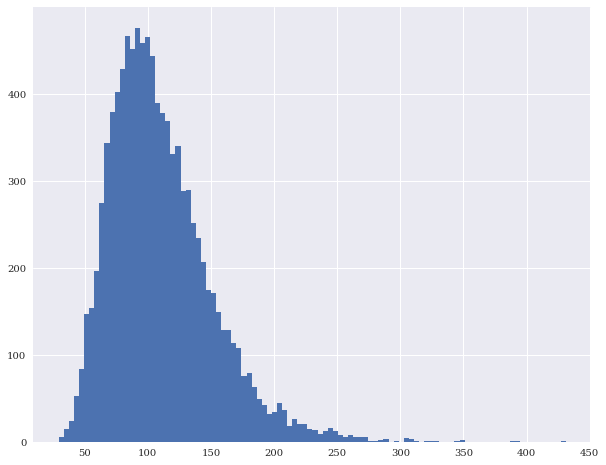

In [10]:
ST2=s0*npr.lognormal((r-0.5*sigma**2)*T,sigma*math.sqrt(T),size=I)
plt.figure(figsize=(10,8))
plt.hist(ST2,bins=100)

In [11]:
import scipy.stats as scs

In [13]:
I=10000
M=50
dt=T/M
S=np.zeros((M+1,I))

In [14]:
S[0]=s0

In [16]:
for t in range(1,M+1):
    S[t]=S[t-1]*np.exp((r-0.5*sigma**2)*dt+sigma*math.sqrt(dt)*npr.standard_normal(I))

In [18]:
S[-1]

array([161.701611  , 134.58689199,  81.07745792, ..., 177.77207913,
        96.78582726,  81.11431087])

In [19]:
x0=0.05
kappa=3
theta=0.02
sigma=0.1
I=10000
M=50
dt=T/M

In [27]:
def srd_euler():
    xh=np.zeros((M+1,I))
    x=np.zeros_like(xh)
    xh[0]=x0
    x[0]=x0
    for t in range(1,M+1):
        xh[t]=(xh[t-1]+
              kappa*(theta-np.maximum(xh[t-1],0))*dt+
              sigma*np.sqrt(np.maximum(xh[t-1],0))*
              math.sqrt(dt)*npr.standard_normal(I))
    x=np.maximum(xh,0)
    return x

In [28]:
x1=srd_euler()

(array([ 10.,  10.,  25.,  53.,  85., 132., 147., 255., 311., 354., 454.,
        525., 539., 579., 594., 611., 595., 568., 503., 523., 395., 417.,
        343., 363., 296., 237., 204., 202., 154., 108.,  82.,  68.,  53.,
         43.,  42.,  27.,  23.,  16.,  13.,   8.,  10.,   5.,   4.,   2.,
          2.,   5.,   1.,   3.,   0.,   1.]),
 array([0.00502237, 0.00589815, 0.00677392, 0.0076497 , 0.00852548,
        0.00940125, 0.01027703, 0.0111528 , 0.01202858, 0.01290436,
        0.01378013, 0.01465591, 0.01553169, 0.01640746, 0.01728324,
        0.01815901, 0.01903479, 0.01991057, 0.02078634, 0.02166212,
        0.0225379 , 0.02341367, 0.02428945, 0.02516522, 0.026041  ,
        0.02691678, 0.02779255, 0.02866833, 0.0295441 , 0.03041988,
        0.03129566, 0.03217143, 0.03304721, 0.03392299, 0.03479876,
        0.03567454, 0.03655031, 0.03742609, 0.03830187, 0.03917764,
        0.04005342, 0.0409292 , 0.04180497, 0.04268075, 0.04355652,
        0.0444323 , 0.04530808, 0.04618385, 0.

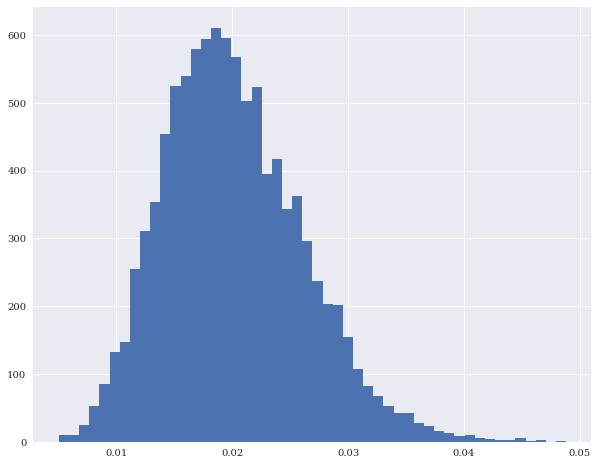

In [29]:
plt.figure(figsize=(10,8))
plt.hist(x1[-1],bins=50)

In [30]:
def srd_exact():
    x = np.zeros((M + 1, I))
    x[0] = x0
    for t in range(1, M + 1):
        df = 4 * theta * kappa / sigma ** 2
        c = (sigma ** 2 * (1 - np.exp(-kappa * dt))) / (4 * kappa)
        nc = np.exp(-kappa * dt) / c * x[t - 1]
        x[t] = c * npr.noncentral_chisquare(df, nc, size=I)
    return x
x2 = srd_exact()

Text(0, 0.5, 'frequency')

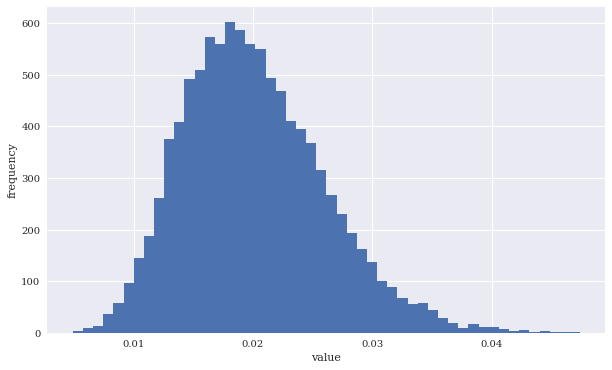

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(x2[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')

In [32]:
def srd_exact():
    x = np.zeros((M + 1, I))
    x[0] = x0
    df = 4 * theta * kappa / sigma ** 2
    c = (sigma ** 2 * (1 - np.exp(-kappa * dt))) / (4 * kappa)
    for t in range(1, M + 1):
        nc = np.exp(-kappa * dt) / c * x[t - 1]
        x[t] = c * npr.noncentral_chisquare(df, nc, size=I)
    return x
x2 = srd_exact()

Text(0, 0.5, 'frequency')

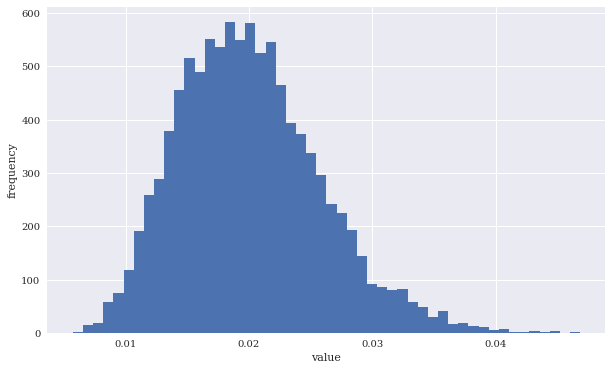

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(x2[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')